In [1]:
# Load datasets
import pandas as pd
sales_data = pd.read_csv('Pizza_ingredients.csv')  # Load your sales dataset
ingredients_data = pd.read_csv('Pizza_Sale.csv')  # Load your ingredient dataset

In [2]:
ingredients_data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [3]:
sales_data.columns

Index(['pizza_name_id', 'pizza_name', 'pizza_ingredients',
       'Items_Qty_In_Grams'],
      dtype='object')

In [4]:
ingredients_data

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1-1-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1-1-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1-1-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1-1-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1-1-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
sales_data

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


1. Data Preprocessing

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load datasets
sales_data = pd.read_csv('Pizza_Sale.csv')  # Load sales dataset
ingredients_data = pd.read_csv('Pizza_ingredients.csv')  # Load ingredients dataset

# Check for missing values
print("Sales Data Missing Values:\n", sales_data.isnull().sum())
print("Ingredients Data Missing Values:\n", ingredients_data.isnull().sum())

# Handle missing values by dropping rows with missing data
sales_data = sales_data.dropna()
ingredients_data = ingredients_data.dropna()

# Convert 'order_date' column to datetime format
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'], errors='coerce')

# Extract useful features from Date (Year, Month, Day of the week)
sales_data['Year'] = sales_data['order_date'].dt.year
sales_data['Month'] = sales_data['order_date'].dt.month
sales_data['Day_of_Week'] = sales_data['order_date'].dt.dayofweek

# Merge sales and ingredients datasets on 'pizza_name_id'
merged_data = pd.merge(sales_data, ingredients_data, on='pizza_name_id', how='inner')

# Check data types and correct any inconsistencies
print("Merged Data Types:\n", merged_data.dtypes)
print("First few rows of merged data:\n", merged_data.head())


Sales Data Missing Values:
 pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64
Ingredients Data Missing Values:
 pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64
Merged Data Types:
 pizza_id                        int64
order_id                        int64
pizza_name_id                  object
quantity                        int64
order_date             datetime64[ns]
order_time                     object
unit_price                    float64
total_price                   float64
pizza_size                     object
pizza_category                 object
pizza_ingredients_x            object
pizza_name_x                   object
Year                          float64
Month         

2. Exploratory Data Analysis

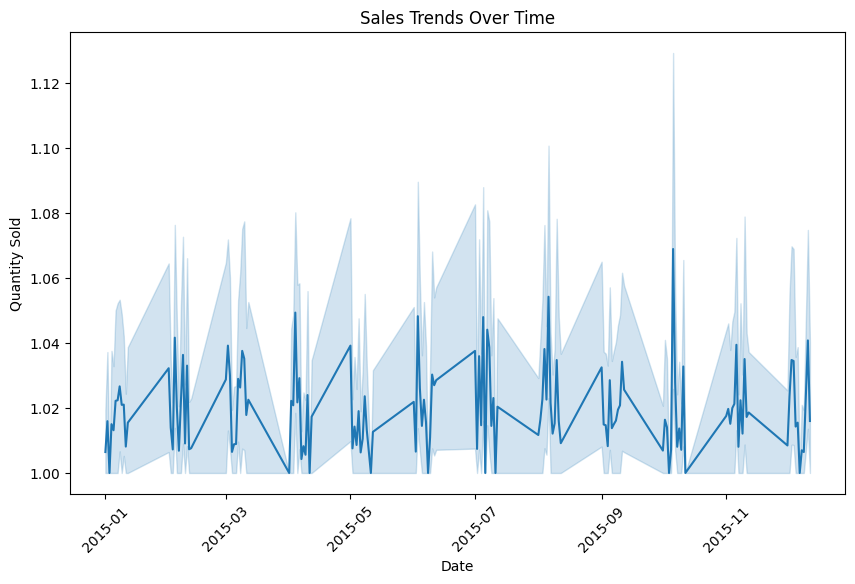

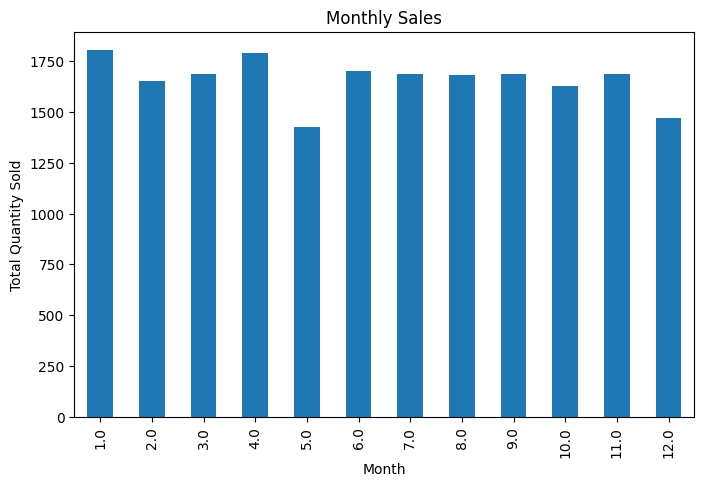

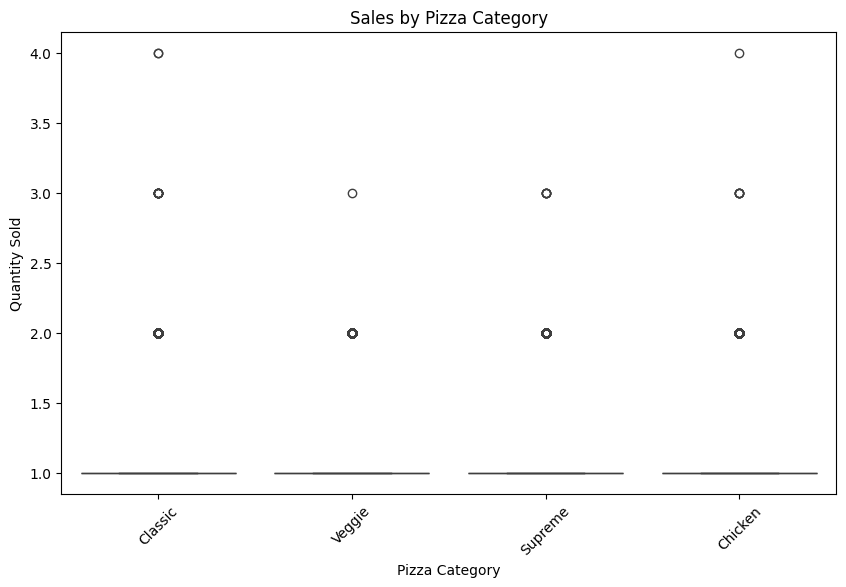

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sales trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_date', y='quantity', data=sales_data)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Check sales seasonality (monthly sales)
monthly_sales = sales_data.groupby('Month')['quantity'].sum()
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='bar', title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

# Analyze sales by pizza category
plt.figure(figsize=(10, 6))
sns.boxplot(x='pizza_category', y='quantity', data=sales_data)
plt.title('Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


Step 3: Time Series Forecasting (ARIMA Model)

In [8]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 3.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.8 MB 3.7 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.8 MB 5.1 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 5.9 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

MAPE: 0.09902661193605497


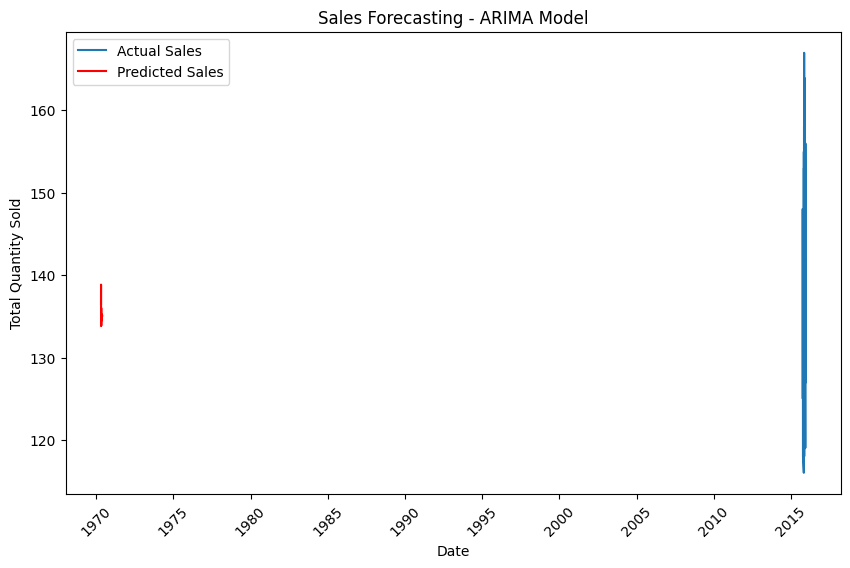

In [9]:
# Import necessary libraries for time series forecasting
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Group sales by date to aggregate total daily sales
daily_sales = sales_data.groupby('order_date')['quantity'].sum().reset_index()

# Set 'order_date' as the index for time series forecasting
daily_sales.set_index('order_date', inplace=True)

# Ensure the index is sorted for proper time series handling
daily_sales = daily_sales.sort_index()

# Train-test split (e.g., train on 80% of the data)
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

# ARIMA model (p, d, q) = (5, 1, 0)
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions for test data
predictions = model_fit.forecast(steps=len(test))

# Evaluate model performance using MAPE
mape = mean_absolute_percentage_error(test, predictions)
print(f'MAPE: {mape}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales', color='red')
plt.title('Sales Forecasting - ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.show()
 

Step 4: Purchase Order Generation

In [10]:
import pandas as pd
import numpy as np

# Load the data
pizza_sales_data = pd.read_csv('Pizza_Sale.csv')
ingredients_data = pd.read_csv('Pizza_ingredients.csv')

# Mock future sales predictions for the next 7 days (since the sales model isn't available)
future_predictions = np.random.randint(50, 100, size=7)  # Replace with your model's forecast

# Function to calculate ingredient requirements based on predicted sales
def calculate_ingredients(predicted_sales, ingredient_data):
    # Initialize a dictionary to hold ingredient requirements
    ingredient_requirements = {}

    # For each predicted day of sales
    for i, daily_sales in enumerate(predicted_sales):
        print(f"Day {i+1} Sales Prediction: {daily_sales}")

        # Get unique pizza types from the ingredient dataset
        unique_pizza_types = ingredient_data['pizza_name_id'].unique()
        num_pizza_types = len(unique_pizza_types)
        
        # Proportionally distribute sales across pizza types
        for pizza in unique_pizza_types:
            pizza_sales = daily_sales / num_pizza_types  # Simple proportional split
            ingredients_for_pizza = ingredient_data[ingredient_data['pizza_name_id'] == pizza]

            # Calculate the required ingredients for each pizza type
            for _, row in ingredients_for_pizza.iterrows():
                ingredient = row['pizza_ingredients']
                quantity_needed = pizza_sales * row['Items_Qty_In_Grams']

                # Add up the quantities required for the predicted period
                if ingredient in ingredient_requirements:
                    ingredient_requirements[ingredient] += quantity_needed
                else:
                    ingredient_requirements[ingredient] = quantity_needed

    return ingredient_requirements

# Calculate the ingredients required for the predicted sales
ingredient_requirements = calculate_ingredients(future_predictions, ingredients_data)

# Create a purchase order DataFrame
purchase_order = pd.DataFrame(ingredient_requirements.items(), columns=['Ingredient', 'Quantity'])

# Display the purchase order
print(purchase_order)


Day 1 Sales Prediction: 57
Day 2 Sales Prediction: 85
Day 3 Sales Prediction: 60
Day 4 Sales Prediction: 88
Day 5 Sales Prediction: 97
Day 6 Sales Prediction: 68
Day 7 Sales Prediction: 96
                 Ingredient      Quantity
0         Barbecued Chicken    544.945055
1               Red Peppers   1816.483516
2             Green Peppers    999.065934
3                  Tomatoes   7084.285714
4                Red Onions  10535.604396
..                      ...           ...
59                   Onions    363.296703
60       Soppressata Salami   1816.483516
61        Peperoncini verdi    181.648352
62  Thai Sweet Chilli Sauce    363.296703
63         Beef Chuck Roast   3451.318681

[64 rows x 2 columns]


Step 5: Final Reporting

In [11]:
import pandas as pd
import numpy as np

# Load the data (replace file paths as necessary)
pizza_sales_data = pd.read_csv('Pizza_Sale.csv')
ingredients_data = pd.read_csv('Pizza_ingredients.csv')

# Mock future sales predictions for the next 7 days (replace this with your model's forecast)
future_predictions = np.random.randint(50, 100, size=7)  # Mock prediction data

# Function to calculate ingredient requirements based on predicted sales
def calculate_ingredients(predicted_sales, ingredient_data):
    # Initialize a dictionary to hold ingredient requirements
    ingredient_requirements = {}

    # For each predicted day of sales
    for i, daily_sales in enumerate(predicted_sales):
        print(f"Day {i+1} Sales Prediction: {daily_sales}")

        # Get unique pizza types from the ingredient dataset
        unique_pizza_types = ingredient_data['pizza_name_id'].unique()
        num_pizza_types = len(unique_pizza_types)
        
        # Proportionally distribute sales across pizza types
        for pizza in unique_pizza_types:
            pizza_sales = daily_sales / num_pizza_types  # Simple proportional split
            ingredients_for_pizza = ingredient_data[ingredient_data['pizza_name_id'] == pizza]

            # Calculate the required ingredients for each pizza type
            for _, row in ingredients_for_pizza.iterrows():
                ingredient = row['pizza_ingredients']
                quantity_needed = pizza_sales * row['Items_Qty_In_Grams']

                # Add up the quantities required for the predicted period
                if ingredient in ingredient_requirements:
                    ingredient_requirements[ingredient] += quantity_needed
                else:
                    ingredient_requirements[ingredient] = quantity_needed

    return ingredient_requirements

# Calculate the ingredients required for the predicted sales
ingredient_requirements = calculate_ingredients(future_predictions, ingredients_data)

# Create a purchase order DataFrame
purchase_order = pd.DataFrame(ingredient_requirements.items(), columns=['Ingredient', 'Quantity'])

# Save the purchase order to a CSV file
purchase_order.to_csv('purchase_order.csv', index=False)

# Placeholder for MAPE (Mean Absolute Percentage Error) - Replace with your actual value
mape = 10.5  # Example MAPE value, replace with your model's MAPE calculation

# Function to generate the final project report
def generate_report(mape, purchase_order):
    report = f"""
    Predictive Purchase Order System for Dominos:
    
    Model Performance:
    MAPE: {mape}%
    
    Purchase Order for Next Week:
    {purchase_order.to_string(index=False)}
    """
    with open('project_report.txt', 'w') as file:
        file.write(report)

# Generate the report
generate_report(mape, purchase_order)

print("Purchase order saved to 'purchase_order.csv' and project report saved to 'project_report.txt'.")


Day 1 Sales Prediction: 53
Day 2 Sales Prediction: 84
Day 3 Sales Prediction: 93
Day 4 Sales Prediction: 58
Day 5 Sales Prediction: 80
Day 6 Sales Prediction: 88
Day 7 Sales Prediction: 78
Purchase order saved to 'purchase_order.csv' and project report saved to 'project_report.txt'.
